# **Introduction to qiskit**
***



## **Making a Measurement**

In [1]:
from qiskit import QuantumRegister , ClassicalRegister , QuantumCircuit
from qiskit_aer import StatevectorSimulator, QasmSimulator
qreg_q = QuantumRegister(1,'q')
creg_c = ClassicalRegister(1,'c')

qc = QuantumCircuit(qreg_q,creg_c)

qc.h(qreg_q[0])
qc.measure(qreg_q,creg_c)

# Q_simulator = QasmSimulator()

M_simulator = StatevectorSimulator()

job = M_simulator.run(qc,shots=1024)
result = job.result()
result.get_counts(qc)

{'0': 506, '1': 518}

This code should look very similar to our earlier examples, but with a few key differences.

***
qc.h(qreg_q[0])   
qc.measure(qreg_q,creg_c)
***

In the first line, we initialize qubit 0 with a Hadamard gate, creating a system in the following state:


$$1/\sqrt{2} \space (|0⟩ + |1⟩) $$

So far nothing new. Then, in the next line we add our **measurement**, using the function measure. This function actually calls upon the class **Measure**, which handles adding the measurement instruction. measure takes two arguments, both the quantum and classical registers.

Note that by using the measure function, we are adding an additional instruction to our QuantumCircuit. That is to say, we aren’t actually making a measurement with this line of code. Remember, a QuantumCircuit object is just a list of instructions, which aren’t actually carried out until we run it on some simulator. Speaking of backends, because we now have a measurement instruction, the backend that we need to call upon is:

***
M_simulator = QasmSimulator()
***

The last three lines of codel: 

***
job = M_simulator.run(qc)   
result = job.result()    
result.get_counts(qc)
***


We are using "run" to run our simulation, on **M_simulator** because we are interesting in measurement results. This returns to us a job object, from which we extract our result.

Alright, now let’s talk about the interaction between the two registers, via measure. In Qiskit, if we pass the entire quantum and classical registers as arguments to measure, the function will by default make a total measurement on the system, and store each qubit’s measurement results to the corresponding index in the ClassicalRegister:

In [2]:
qreg_q = QuantumRegister(2,'q')
creg_c = ClassicalRegister(2,'c')

qc = QuantumCircuit(qreg_q,creg_c)

qc.h(qreg_q[0])
qc.h(qreg_q[1])
qc.measure(qreg_q,creg_c)

job = M_simulator.run(qc,shots=100)
result = job.result()
result.get_counts(qc)

{'00': 25, '10': 25, '11': 31, '01': 19}

If instead we want to only make a partial measurement, say on qubit 0 only, we can do so by specifying the quantum and classical indices:

In [3]:
qreg_q = QuantumRegister(2,'q')
creg_c = ClassicalRegister(2,'c')

qc = QuantumCircuit(qreg_q,creg_c)

qc.h(qreg_q[0])
qc.h(qreg_q[1])
qc.measure(qreg_q[0],creg_c[1])

job = M_simulator.run(qc)
result = job.result()
result.get_counts(qc)

{'00': 1}

## **Observing Quantum Circuits**
***

### **data**

In [4]:
qreg_q = QuantumRegister(2 ,name= 'q')
creg_c = ClassicalRegister(2 ,name= 'c')

qc = QuantumCircuit(qreg_q,creg_c)

qc.h(qreg_q[0])
qc.h(qreg_q[1])
qc.measure(qreg_q[0],creg_c[0])

print("Outfrom from data function: " , qc.data)

Outfrom from data function:  [CircuitInstruction(operation=Instruction(name='h', num_qubits=1, num_clbits=0, params=[]), qubits=(<Qubit register=(2, "q"), index=0>,), clbits=()), CircuitInstruction(operation=Instruction(name='h', num_qubits=1, num_clbits=0, params=[]), qubits=(<Qubit register=(2, "q"), index=1>,), clbits=()), CircuitInstruction(operation=Instruction(name='measure', num_qubits=1, num_clbits=1, params=[]), qubits=(<Qubit register=(2, "q"), index=0>,), clbits=(<Clbit register=(2, "c"), index=0>,))]


### **qregs**

In [5]:
qreg_q = QuantumRegister(2 ,name= 'q')
creg_c = ClassicalRegister(2 ,name= 'c')

qc = QuantumCircuit(qreg_q,creg_c)

qc.h(qreg_q[0])
qc.h(qreg_q[1])
qc.measure(qreg_q[0],creg_c[0])

print("Outfrom from qregs function: " , qc.qregs)

Outfrom from qregs function:  [QuantumRegister(2, 'q')]


### **cregs**

In [6]:
qreg_q = QuantumRegister(2 ,name= 'q')
creg_c = ClassicalRegister(2 ,name= 'c')

qc = QuantumCircuit(qreg_q,creg_c)

qc.h(qreg_q[0])
qc.h(qreg_q[1])
qc.measure(qreg_q[0],creg_c[0])

print("Outfrom from cregs function: " , qc.cregs)

Outfrom from cregs function:  [ClassicalRegister(2, 'c')]


## **Sharing Registers**
***

Now suppose we are working with an algorithm that utilizes multiple QuantumCircuits. Qiskit allows us to have QuantumCircuit objects interact in a variety of ways, so long as we are careful in defining which registers are a part of which circuits. For example, let’s start with two QuantumCircuits that have no interaction:

In [7]:
qreg_q1 = QuantumRegister(1 ,name= 'q1')
creg_c1 = ClassicalRegister(1 ,name= 'c1')
qc1 = QuantumCircuit(qreg_q1,creg_c1)

qreg_q2 = QuantumRegister(1 ,name= 'q2')
creg_c2 = ClassicalRegister(1 ,name= 'c2')
qc2 = QuantumCircuit(qreg_q2,creg_c2)

qc1.h(qreg_q1[0])
qc1.measure(qreg_q1[0], creg_c1[0])

qc2.h(qreg_q2[0])

Nothing too special here. Just two circuits defined parallel to each other. We could choose to pass either of them to a simulator, and their results would be completely independent.


Now, there are a couple ways we can have our two QuantumCircuits interact. For example, we can take measurement results from one circuit (after running it on a simulator) and store them in the other’s ClassicalRegister, or have one circuit apply gate operations on the other’s qubits. BUT, in order to do these kinds of things, we must give each QuantumCircuit access to each other’s registers:

In [8]:
qreg_q1 = QuantumRegister(1 ,name= 'q1')
creg_c1 = ClassicalRegister(1 ,name= 'c1')
qc1 = QuantumCircuit(qreg_q1,creg_c1)

qreg_q2 = QuantumRegister(1 ,name= 'q2')
creg_c2 = ClassicalRegister(1 ,name= 'c2')
qc2 = QuantumCircuit(qreg_q2,creg_c2)

qc1.add_register(creg_c2)
qc2.add_register(qreg_q1)

qc1.h(qreg_q1[0])
qc2.h(qreg_q2[0])
qc1.measure(qreg_q1[0], creg_c2[0])

qc2.h(qreg_q1[0])


Take a careful look at these two QuantumCircuits. In ’qc1’, we make sure to include the ClassicalRegister ’creg_2’, so that we can store our measurement result:

***
’measure qreg_q1[0] -> creg_c2[0]’
***

In ’qc2’, we do the same thing for the QuantumRegister ’qreg_q1’, so that we can apply a Hadamard gate:

***
’qc2.h(qreg_q1[0])’.
***



## **Combining QuantumCircuits**
***

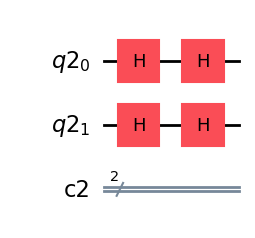

In [9]:
qreg_q1 = QuantumRegister(2 ,name= 'q1')
creg_c1 = ClassicalRegister(2 ,name= 'c1')
qc1 = QuantumCircuit(qreg_q1,creg_c1)

qreg_q2 = QuantumRegister(2 ,name= 'q2')
creg_c2 = ClassicalRegister(2 ,name= 'c2')
qc2 = QuantumCircuit(qreg_q2,creg_c2)

qc1.h(qreg_q1[0])
qc1.h(qreg_q1[1])

qc2.h(qreg_q2[0])
qc2.h(qreg_q2[1])

qc3 = qc2.compose(qc1)
qc1 = qc3.compose(qc1)

qc3.draw('mpl')
# qc1.draw('mpl')

## **Multiple Qubit Gates**
***
List of commonly used multiple-qubit gates in Qiskit

| Names | Example | Notes |
|-------|---------|-------|
| CX, CNOT | `qc.cx(0,1)` or `qc.cnot(0,1)` | Applies the X gate to quantum wire 1, subject to the state of the control qubit on wire 0. |
| Swap | `qc.swap(0,1)` | Swaps the qubit states of wires 0 and 1. |
| CCX, Toffoli | `qc.ccx(0,1,2)` | Applies the X gate to quantum wire 2, subject to the state of the control qubits on wires 0 and 1. |
| CSwap, Fredkin | `qc.cswap(0,2,3)` or `qc.fredkin(0,2,3)` | Swaps the qubit states of wires 2 and 3, subject to the state of the control qubit on wire 0. |
| CH | `qc.ch(0,1)` | Applies the H gate to quantum wire 1, subject to the state of the control qubit on wire 0. |
| CP, Control-Phase | `qc.cp(math.pi/4,0,1)` | Applies the phase gate to quantum wire 1, subject to the state of the control qubit on wire 0. |
| CRX, Control-RX | `qc.crx(math.pi/2,2,3)` | Applies the RX gate to quantum wire 3, subject to the state of the control qubit on wire 2. |
| CRY, Control-RY | `qc.cry(math.pi/8,2,3)` | Applies the RY gate to quantum wire 3, subject to the state of the control qubit on wire 2. |
| CRZ | `qc.crz(math.pi/4,0,1)` | Applies the RZ gate to quantum wire 1, subject to the state of the control qubit on wire 0. |
| CSX | `qc.csx(0,1)` | Applies the SX (square root of X) gate to quantum wire 1, subject to the state of the control qubit on wire 0. |
| CU | `qc.cu(math.pi/2,0,math.pi,0,0,1)` | Applies the U gate with an additional global phase argument to quantum wire 1, subject to the state of the control qubit on wire 0. |
| CY, Control-Y | `qc.cy(2,3)` | Applies the Y gate to quantum wire 3, subject to the state of the control qubit on wire 2. |
| CZ, Control-Z | `qc.cz(1,2)` | Applies the Z gate to quantum wire 2, subject to the state of the control qubit on wire 1. |
| DCX | `qc.dcx(2,3)` | Applies two CNOT gates whose control qubits are on wires 2 and 3. |
| iSwap | `qc.iswap(0,1)` | Swaps the qubit states of wires 0 and 1, and changes the phase of the \|01⟩ and \|10⟩ amplitudes by *i*. |
| MCP, Multi-control phase | `qc.mcp(math.pi/4, [0,1,2],3)` | Applies the phase gate to quantum wire 3, subject to the state of the control qubits on wires 0, 1, and 2. |
| MCX, Multi-control X | `qc.mcx([0,1,2],3)` | Applies the X gate to quantum wire 3, subject to the state of the control qubits on wires 0, 1, and 2. |


In [12]:
qc= QuantumCircuit(2,2)
qc.h(0)
qc.cx(0,1)
# qc.measure_all()
qc.measure([0,1],[0,1])
# qc.draw('mpl')
# M_simulator = QasmSimulator()
Q_simulator = QasmSimulator()

M_simulator = StatevectorSimulator()


# job = Q_simulator.run(qc)
job = M_simulator.run(qc, shots=1024)
result = job.result()
result.get_counts(qc)

{'11': 543, '00': 481}

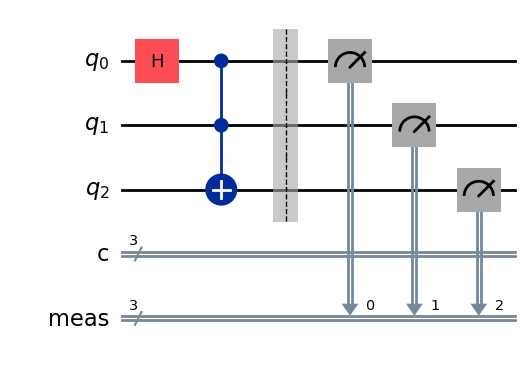

In [13]:
qc= QuantumCircuit(3,3)
qc.h(0)
qc.ccx(0,1,2)
# qc.measure([0,1,2],[0,1,2])
qc.measure_all()
qc.draw('mpl')